# Statistical Models Regression

# China analysis

In [7]:
import numpy as np
import matplotlib.pyplot as plt

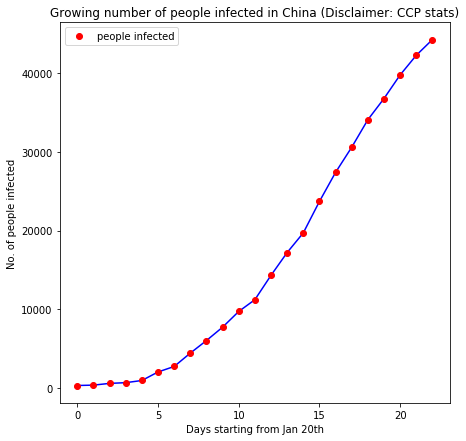

In [8]:
start = "Jan 20th" # start of keeping counts?
# current = "Feb 11th"
np_china = np.array([278, 326, 547, 639, 916, 2000, 2700, 4400, 6000, 7700, 9700, 11200, 14300, 17200, 19700, 23700, 27400, 
                     30600, 34100, 36800, 39800, 42300, 44300])

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected in China (Disclaimer: CCP stats)")

plt.plot(range(len(np_china)), np_china, 'b-')

for i in range(len(np_china)):
    a, = plt.plot(i, np_china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Non-china analysis

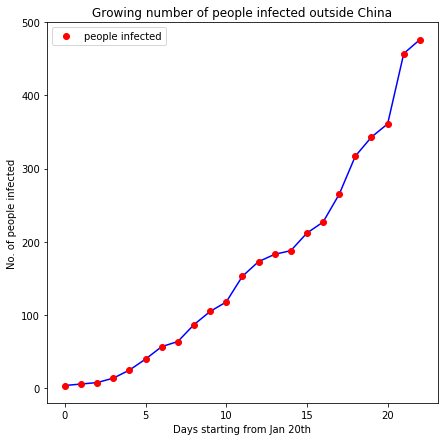

In [9]:
non_china = [4, 6, 8, 14, 25, 40, 57, 64, 87, 105, 118, 153, 173, 183, 188, 212, 227, 265, 317, 343, 361, 457, 476]

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected outside China")

plt.plot(range(len(non_china)), non_china, 'b-')

for i in range(len(non_china)):
    a, = plt.plot(i, non_china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

In [10]:
np_days = np.arange(1, len(np_china)+1)

# Statistical Models

# Examining different Growth rates

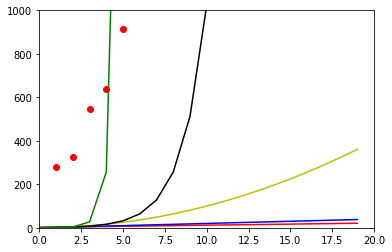

In [11]:
# understanding different growth rates...
rr = 20
plt.axis([0, rr, 0, 1000])

# additive growth rate
plt.plot(np.arange(rr), [x + 2 for x in range(rr)], 'r-')

# multiplicative growth rate
plt.plot(np.arange(rr), [x * 2 for x in range(rr)], 'b-')

# logarithmic growth rate
plt.plot(np.arange(rr), [x ** 2 for x in range(rr)], 'y-')

# exponential growth rate
plt.plot(np.arange(rr), [2 ** x for x in range(rr)], 'k-')

# self power growth rate
plt.plot(np.arange(rr), [x ** x for x in range(rr)], 'g-')

plt.plot(np_days, np_china, 'ro')

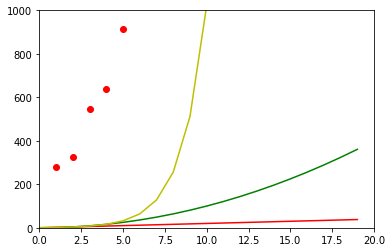

In [12]:
rr = 20
plt.axis([0, rr, 0, 1000])

# linear growth
plt.plot(np.arange(rr), [x * 2 for x in range(rr)], 'r-')

# quadratic growth
plt.plot(np.arange(rr), [x ** 2 for x in range(rr)], 'g-')

# exponential growth
plt.plot(np.arange(rr), [2 ** x for x in range(rr)], 'y-')

plt.plot(np_days, np_china, 'ro')

# Using Moving Averages

In [13]:
# forecasting with a simple moving average
def sma(x1):
    # x1: a vector used as input
    
    tot = 0
    avg = []
    for i in range(len(x1)):
        tot += x1[i]
        av = tot / (i + 1)
        avg.append(av)
        
    return avg


# forcasting with a simple moving average - with specific windows???
def sma_win(t, x1):
    # t: the size of the window
    # x1: the vector used as input
    
    avg = []
    
    for i in range(0, len(x1), t):
        tot = 0
        
        for j in range(i, i + t):
            if j < len(x1):
                tot += x1[j]
                av = tot/(t)
                avg.append(av)
            
    return avg


# forcasting with exponential smoothing
def exp_smo(alp, x1):
    # alp: the alpha value that will be used as the control variable
    # x1: the vector used as input
    
    st_ = x1[0]
    avg = [st_]
    
    for i in range(1, len(x1)):
        st = x1[i]
        cur = (alp * st) + ((1 - alp) * st_)
        st_ = cur
        avg.append(st_)
        
    return avg

Results of the simple moving average:  [278.0, 302.0, 383.6666666666667, 447.5, 541.2, 784.3333333333334, 1058.0, 1475.75, 1978.4444444444443, 2550.6, 3200.5454545454545, 3867.1666666666665, 4669.692307692308, 5564.714285714285, 6507.066666666667, 7581.625, 8747.411764705883, 9961.444444444445, 11231.894736842105, 12510.3, 13809.809523809523, 15104.818181818182, 16374.173913043478]


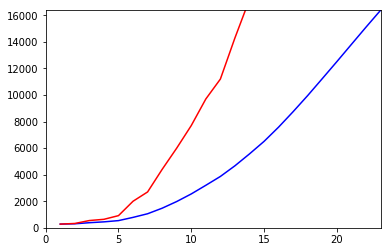

In [14]:
# testing the simple moving average
smachi = sma(china)
print("Results of the simple moving average: ", smachi)

plt.axis([0, len(smachi), 0, max(smachi)])
plt.plot(np.arange(1, len(smachi)+1), smachi, 'b-')
plt.plot(np_days, np_china, 'r-')

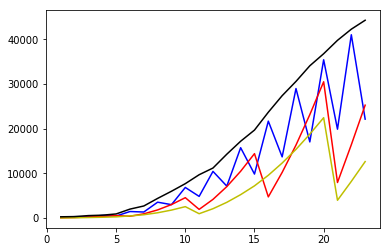

In [15]:
# fail??

sma2_chi = sma_win(2, china)
sma5_chi = sma_win(5, china)
sma10_chi = sma_win(10, china)

plt.plot(np.arange(1, len(sma2_chi)+1), sma2_chi, 'b-')
plt.plot(np.arange(1, len(sma5_chi)+1), sma5_chi, 'r-')
plt.plot(np.arange(1, len(sma10_chi)+1), sma10_chi, 'y-')
plt.plot(np_days, np_china, 'k-')

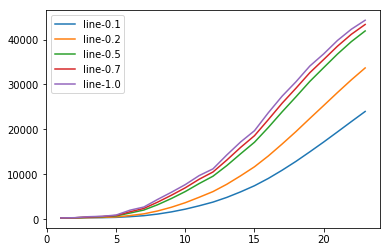

In [16]:
handl = []
for i in [0.1, 0.2, 0.5, 0.7, 1.0]:
    ex = exp_smo(i, china)
    t, = plt.plot(np.arange(1, len(ex)+1), ex, label='line-'+str(i))
    handl.append(t)
    
plt.legend(handles=handl)

# ARIMA model

In [18]:
import pandas as pd

chid, nond = dict(), dict()
chid['days'], nond['days'] = [x for x in range(1, len(china)+1)], [x for x in range(1, len(non_china)+1)]
chid['infected'], nond['infected'] = china, non_china

pdchi, pdnon = pd.DataFrame(chid), pd.DataFrame(nond)
pdchi

,days,infected
0,1,278
1,2,326
2,3,547
3,4,639
4,5,916
5,6,2000
6,7,2700
7,8,4400
8,9,6000
9,10,7700


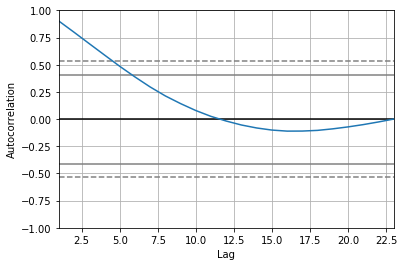

In [19]:
pd.plotting.autocorrelation_plot(pdchi)

In [20]:
'''
import sys
!conda install --yes --prefix {sys.prefix} statsmodels
'''

'\nimport sys\n!conda install --yes --prefix {sys.prefix} statsmodels\n'

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[se

                             ARIMA Model Results                              
Dep. Variable:             D.infected   No. Observations:                   22
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -167.677
Method:                       css-mle   S.D. of innovations            458.217
Date:                Wed, 12 Feb 2020   AIC                            349.353
Time:                        14:15:05   BIC                            356.991
Sample:                             1   HQIC                           351.153
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1708.7265    598.865      2.853      0.012     534.973    2882.480
ar.L1.D.infected     0.5596      0.208      2.692      0.016       0.152       0.967
ar.L2.D.infected     0.4906 

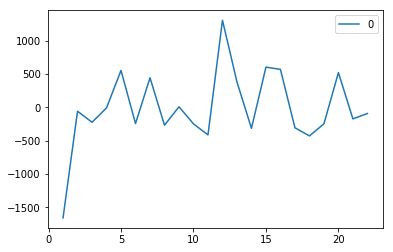

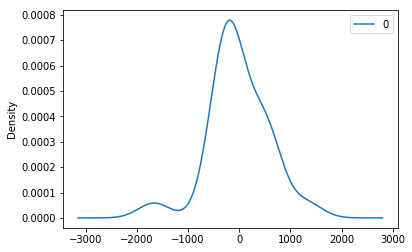

                 0
count    22.000000
mean    -13.128109
std     576.379910
min   -1660.726494
25%    -262.813659
50%    -132.470627
75%     429.048147
max    1308.949290


In [21]:
import statsmodels.tsa.arima_model as sts

ari1 = sts.ARIMA(pdchi['infected'], order=(5, 1, 0))
ari1_fit = ari1.fit(disp=0)
print(ari1_fit.summary())

ari1_res = pd.DataFrame(ari1_fit.resid)
ari1_res.plot()
plt.show()
ari1_res.plot(kind='kde')
plt.show()
print(ari1_res.describe())

In [22]:
ari1_fit.forecast()

(array([46398.88304127]),
 array([458.21681124]),
 array([[45500.79459412, 47296.97148842]]))